<a href="https://colab.research.google.com/github/unbrae/DataScience/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# **Exploração inicial dos dados do primeiro DataSet**

**Working Hours Per Week**

In [10]:

df1 = pd.read_csv('https://raw.githubusercontent.com/unbrae/DataScience/dataSets/working_hours_per_week.csv')
df1 = pd.DataFrame(df1)
# Selecionando apenas as Colunas Country e 2015
df1 = df1[['country','2015']]

print(f'Estrutura do DataFrame\n')
display(df1.shape)
print(f'\nPrimeiras 5 linhas do DataFrame\n')
display(df1.head())
print(f'\nÚltimas 5 linhas do DataFrame\n')
display(df1.tail())
print(f'\nSoma de valores duplicados\n')  
display(df1.country.duplicated().sum())
print(f'\nValor mínimo, máximo e média da coluna 2015\n')
display(df1['2015'].min(),df1['2015'].max(),df1['2015'].mean())

Estrutura do DataFrame



(137, 2)


Primeiras 5 linhas do DataFrame



,country,2015
0,Aruba,NaN
1,Albania,39.6
2,United Arab Emirates,NaN
3,Argentina,42.9
4,Armenia,37.9



Últimas 5 linhas do DataFrame



,country,2015
132,Vietnam,41.3
133,Samoa,NaN
134,Yemen,NaN
135,South Africa,43.3
136,Zimbabwe,NaN



Soma de valores duplicados



0


Valor mínimo, máximo e média da coluna 2015



32.4

50.0

40.23033707865167

# **Efetuando Reshape do DataSet *Woking Hours Per Week***


*   Utilizei o comando *melt()* do Pandas para inveter a coluna *2015* para linha.
*   Em seguida renomear a nova coluna para *Year* e dar o nome da coluna dos valores para *Hours*.



In [11]:

df1 = pd.melt(df1,id_vars=['country'],var_name='Year',value_name='Hours')
df1 = df1.rename(columns={'country':'Country'})

df1

,Country,Year,Hours
0,Aruba,2015,NaN
1,Albania,2015,39.6
2,United Arab Emirates,2015,NaN
3,Argentina,2015,42.9
4,Armenia,2015,37.9
...,...,...,...
132,Vietnam,2015,41.3
133,Samoa,2015,NaN
134,Yemen,2015,NaN
135,South Africa,2015,43.3


# **Qualidade dos Dados**


*   Verifiquei a quantidade de valores nulos em cada coluna do DataSet
*   Desconsiderei os valores nulos
*   Em seguida utilizei o método *describe()* analisar novamente os dados



In [12]:

print(f'Verificando valores nulos\n')
display(df1.isnull().sum())

# Retirando os valores nulos da coluna Hours
df1 = df1[~ np.isnan(df1['Hours'])]

print(f'\nValores Nulos desconsiderados\n')
display(df1.isnull().sum())

print(f'\nDescrição resumido dos dados\n')
display(df1.describe())

Verificando valores nulos



Country     0
Year        0
Hours      48
dtype: int64


Valores Nulos desconsiderados



Country    0
Year       0
Hours      0
dtype: int64


Descrição resumido dos dados



,Hours
count,89.000000
mean,40.230337
std,3.977476
min,32.400000
25%,37.400000
50%,39.500000
75%,42.900000
max,50.000000


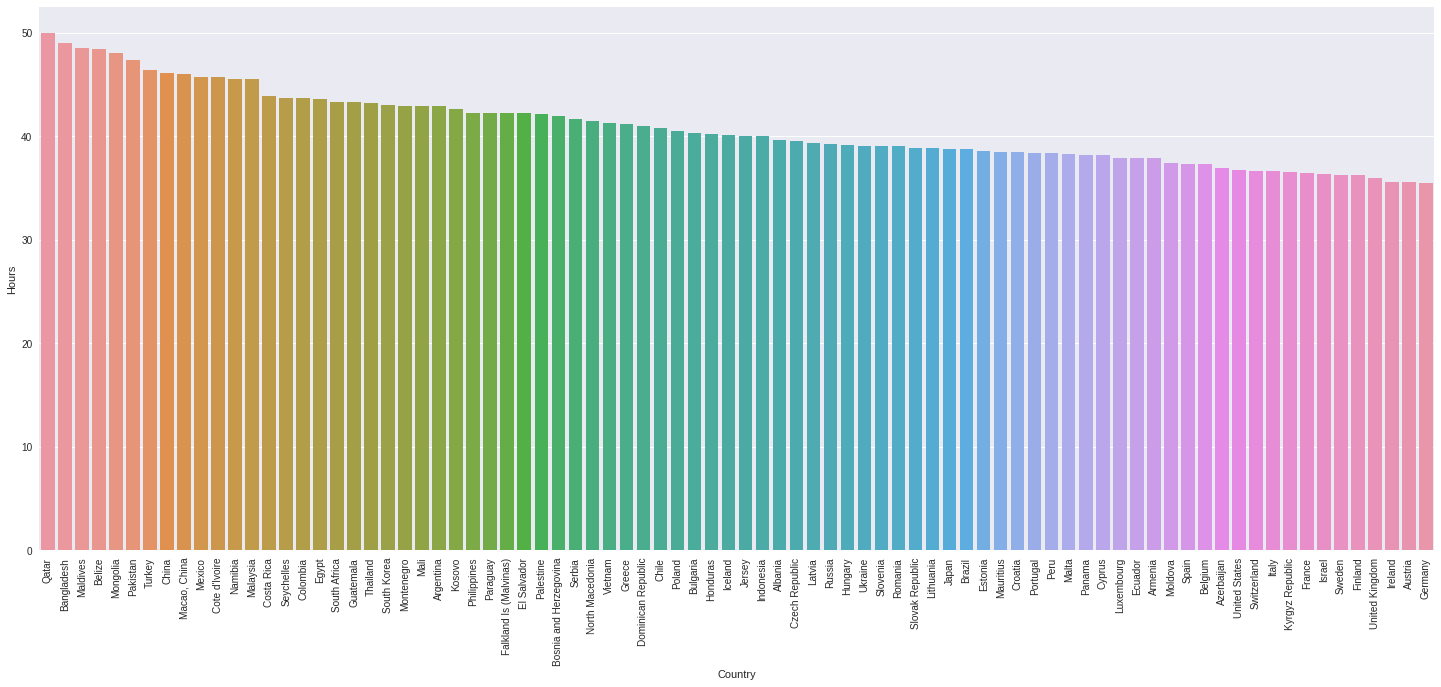

In [32]:
ordenados = df1.sort_values(by= ["Hours","Country"], ascending=False)
ordenados = ordenados[ordenados['Hours'] > 35]

plt.figure(figsize=(25,10))
mpl.style.use(['seaborn'])
sns.barplot(x=ordenados.Country, y=ordenados.Hours)
plt.xticks(rotation=90)

plt.show()


In [ ]:
# Exploração incial dos dados do segundo DataSet: Life Expectancy

df2 = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/Life_Expectancy_Data.csv')
df2.rename(columns={' BMI ':'BMI', 'Life expectancy ':'Life_expectancy'}, inplace=True)
df2 = df2[df2.Year == 2015]
df2 = df2[['Country','Year','Status','Adult Mortality','GDP','Population','Schooling']]

print(f'Estrutura do DataFrame\n')
display(df2.shape)
print(f'\nPrimeiras 5 linhas do DataFrame\n')
display(df2.head())
print(f'\nÚltimas 5 linhas do DataFrame\n')
display(df2.tail())

Estrutura do DataFrame



(183, 7)


Primeiras 5 linhas do DataFrame



,Country,Year,Status,Adult Mortality,GDP,Population,Schooling
0,Afghanistan,2015,Developing,263.0,584.259210,33736494.0,10.1
16,Albania,2015,Developing,74.0,3954.227830,28873.0,14.2
32,Algeria,2015,Developing,19.0,4132.762920,39871528.0,14.4
48,Angola,2015,Developing,335.0,3695.793748,2785935.0,11.4
64,Antigua and Barbuda,2015,Developing,13.0,13566.954100,NaN,13.9



Últimas 5 linhas do DataFrame



,Country,Year,Status,Adult Mortality,GDP,Population,Schooling
2858,Venezuela (Bolivarian Republic of),2015,Developing,157.0,NaN,NaN,14.3
2874,Viet Nam,2015,Developing,127.0,NaN,NaN,12.6
2890,Yemen,2015,Developing,224.0,NaN,NaN,9.0
2906,Zambia,2015,Developing,33.0,1313.889646,161587.0,12.5
2922,Zimbabwe,2015,Developing,336.0,118.693830,15777451.0,10.3


In [ ]:
# Fazendo um merge entre os 2 DataSets, utilizando a coluna Country como parâmetro

df2 = pd.merge(df2, df1[['Country','Hours']], on='Country')

countryStatus = df2[['Country','Status','Adult Mortality','GDP','Population','Schooling','Hours_x']]
countryStatus = countryStatus.rename(columns={'Hours_x':'Hours'})

countryStatus


,Country,Status,Adult Mortality,GDP,Population,Schooling,Hours
0,Albania,Developing,74.0,3954.227830,28873.0,14.2,39.6
1,Argentina,Developing,116.0,13467.123600,43417765.0,17.3,42.9
2,Armenia,Developing,118.0,369.654776,291695.0,12.7,37.9
3,Australia,Developed,59.0,56554.387600,23789338.0,20.4,33.4
4,Austria,Developed,65.0,43665.947000,8633169.0,15.9,35.6
...,...,...,...,...,...,...,...
68,Sweden,Developed,53.0,5585.258470,9799186.0,15.9,36.2
69,Switzerland,Developed,49.0,8989.842400,8282396.0,16.0,36.6
70,Thailand,Developing,148.0,5814.863134,686576.0,13.6,43.2
71,Turkey,Developing,16.0,1979.525690,78271472.0,14.5,46.4


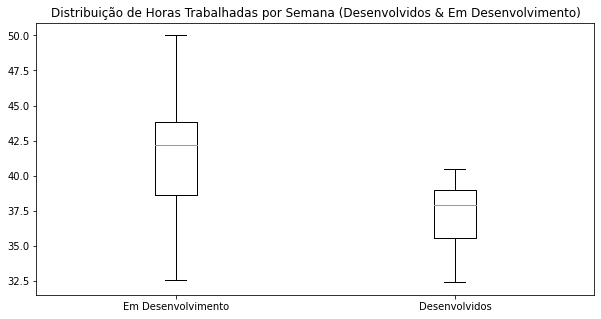

,min,max,mean
Status,,,
Developed,32.4,40.5,37.207407
Developing,32.6,50.0,41.897826


In [ ]:
#

plt.figure(figsize=(10,5))
plt.boxplot(countryStatus[countryStatus.Status == 'Developing'].Hours,positions=[1],showfliers=False)
plt.boxplot(countryStatus[countryStatus.Status == 'Developed'].Hours,positions=[2],showfliers=False)
plt.title('Distribuição de Horas Trabalhadas por Semana (Desenvolvidos & Em Desenvolvimento)')
plt.xticks(ticks=[1,2],labels=['Em Desenvolvimento','Desenvolvidos'])
plt.show()

desc = (countryStatus.groupby('Status').Hours).agg(['min','max','mean'])
display(desc)

